In [1]:
#importing required libraries
import numpy as np
import tensorflow
#import keras
import os
import glob
from skimage import io
import skimage
import random
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
image=io.imread('panda.jpg')

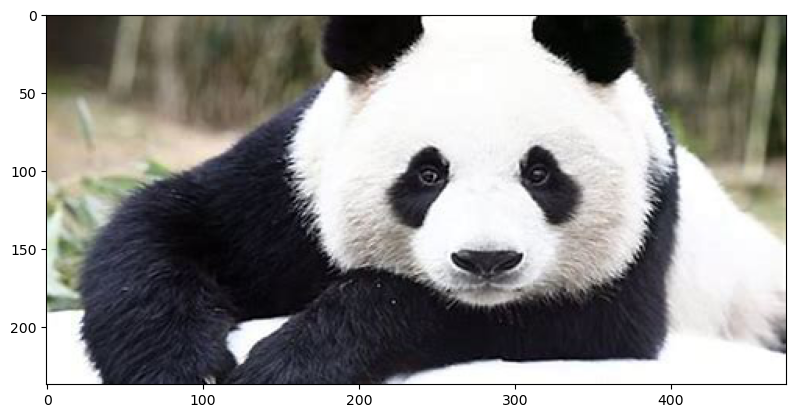

In [3]:
i,(im1)=plt.subplots(1)
#plotting the original image
i.set_figwidth(15)
im1.imshow(image)

Text(0.5, 0.98, 'Original image and the RGB channels')

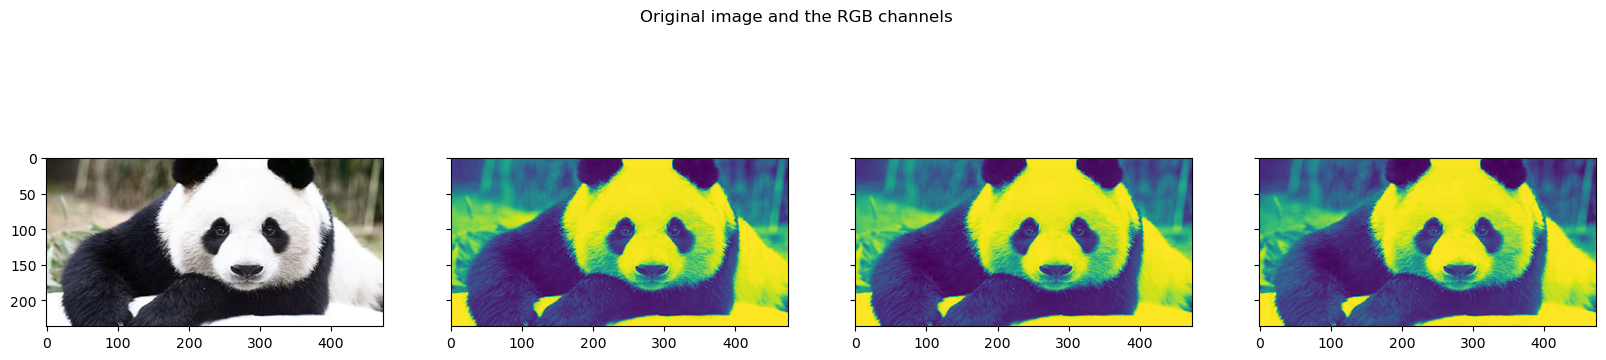

In [6]:
#plotting the original image and the RGB channel
i,(im1,im2,im3,im4)=plt.subplots(1,4,sharey=True)
i.set_figwidth(20)
im1.imshow(image)  #original image
im2.imshow(image[:, : , 0])  #red
im3.imshow(image[:, : , 1])  #green
im4.imshow(image[:, : , 2])  #blue
i.suptitle('Original image and the RGB channels')

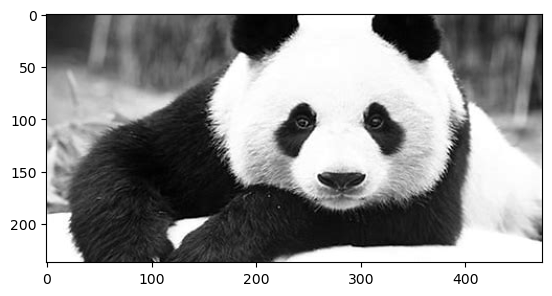

In [7]:
#draw gray image
gray_image=skimage.color.rgb2gray(image)
plt.imshow(gray_image, cmap='gray')

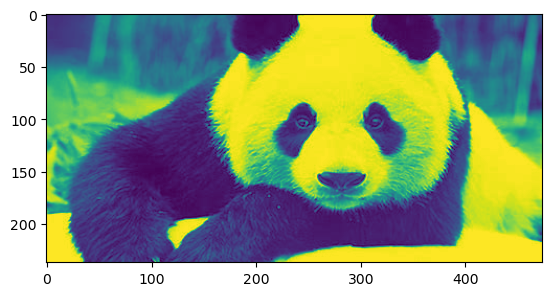

In [8]:
#normalization(usually applied to convert an images pixel values to a typical or more familiar sense)
#predefined range(normally {0,1}or {-1,1})
norm_range = (gray_image - np.min(gray_image))/(np.max(gray_image) - np.min(gray_image))
plt.imshow(norm_range)

In [9]:
!pip install keras_preprocessing

   ---------------------------------------- 0.0/42.6 kB ? eta -:--:--
   --------- ------------------------------ 10.2/42.6 kB ? eta -:--:--
   -------------------------------------- - 41.0/42.6 kB 393.8 kB/s eta 0:00:01
   ---------------------------------------- 42.6/42.6 kB 296.7 kB/s eta 0:00:00


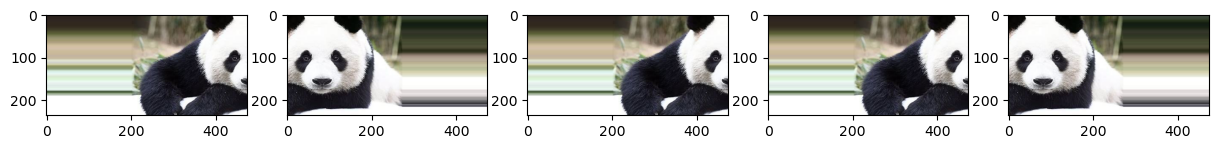

In [13]:
from numpy import expand_dims
from keras_preprocessing.image import load_img
from keras_preprocessing.image import img_to_array
from keras_preprocessing.image import ImageDataGenerator

#convert to numpy array
data=img_to_array(image)

#expand dimension to one sample
samples=expand_dims(image,0)

#create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-200,200])

#create an interator
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=5, figsize=(15,15))

#generate batch of images
for i in range(5):
    
    #convert to nsigned integers
    images = next(it)[0].astype('uint8')
   #plot image
    im[i].imshow(images)

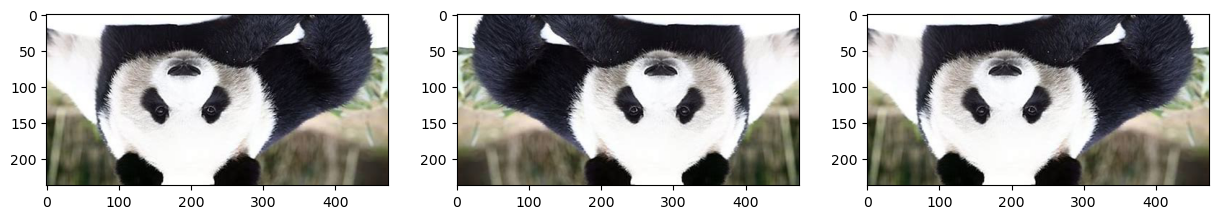

In [16]:
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
it=datagen.flow(samples, batch_size=1)
fig, im=plt.subplots(nrows=1,ncols=3, figsize=(15,15))
for i in range(3):

    images = next(it)[0].astype('uint8')
    im[i].imshow(images)

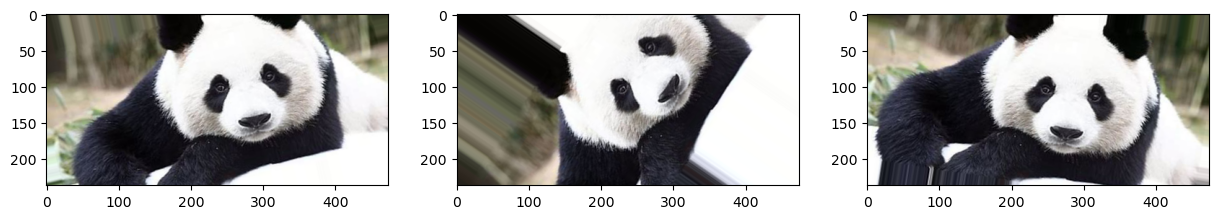

In [19]:
#rotation
datagen = ImageDataGenerator(rotation_range=60, fill_mode='nearest')

it=datagen.flow(samples, batch_size=1)
fig, im=plt.subplots(nrows=1,ncols=3, figsize=(15,15))

for i in range(3):

    images = next(it)[0].astype('uint8')
   
    im[i].imshow(images)

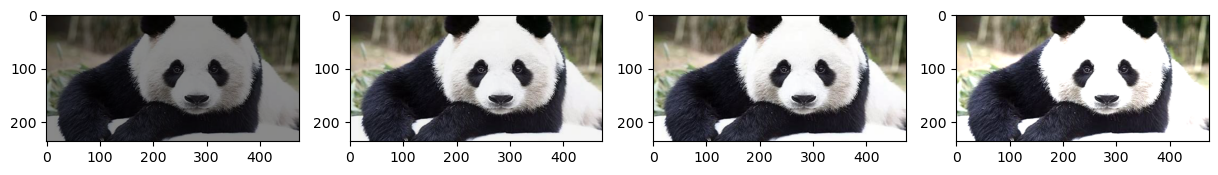

In [20]:
#for brightness 
datagen = ImageDataGenerator(brightness_range=[0.3,2.0])

it=datagen.flow(samples, batch_size=1)
fig, im=plt.subplots(nrows=1,ncols=4, figsize=(15,15))

for i in range(4):

    images = next(it)[0].astype('uint8')
   
    im[i].imshow(images)

C:\Users\ayasa\anaconda\Lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\ayasa\anaconda\Lib\site-packages\keras_preprocessing\image\image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


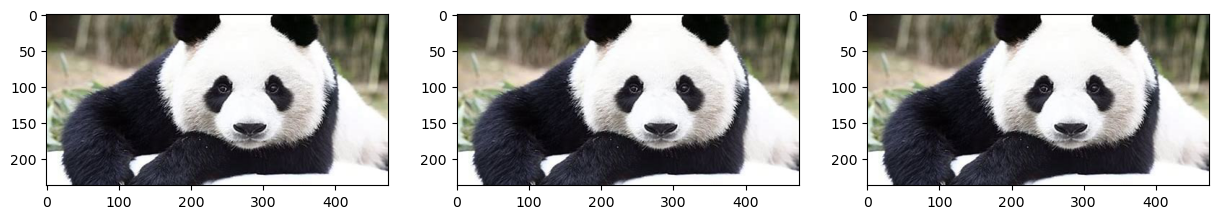

In [21]:
#standardizing image
datagen = ImageDataGenerator(featurewise_center=True,
        featurewise_std_normalization=True)

it=datagen.flow(samples, batch_size=1)
fig, im=plt.subplots(nrows=1,ncols=3, figsize=(15,15))

for i in range(3):
    
    images = next(it)[0].astype('uint8')
   
    im[i].imshow(images)